<a href="https://colab.research.google.com/github/QuinnNgo97/Project-CDC-Diabetes-Health-Indicators/blob/main/Final_presentation_season_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/diabetes_012_health_indicators_BRFSS2015.csv")

In [ ]:
#df.head(5)
#df.tail(5)
df.info()
#df.describe() #chỉ xem biến có số
#df.shape #a bit too fat, but we can remove some features
#df.isnull().sum() # check null
#df.duplicated().sum() #check duplicate rowa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
unique_counts=df.nunique()
print("Number of unique data points in each column:")
print(unique_counts)

Number of unique data points in each column:
Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'Healthy'), Text(1, 0, 'Diabetes'), Text(2, 0, 'Prediabetes')])

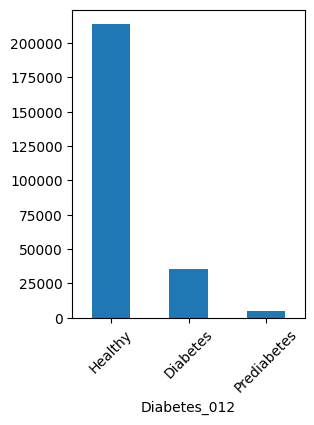

In [ ]:
#Quick barplot for Diabetes category
plt.figure(figsize=(3,4),dpi=100)
df["Diabetes_012"].value_counts().plot.bar()
plt.xticks([0,1, 2], ['Healthy', 'Diabetes', 'Prediabetes'])
plt.xticks(rotation=45)

In [ ]:
#new column with Diabetes 0/1
df['Diabetes_01'] = df['Diabetes_012'].apply(lambda x: 1 if x > 0 else 0)
#drop column with Diabetes 0/1/2
df.drop(['Diabetes_012'], axis=1, inplace=True)
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_01
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0


(array([0, 1]), [Text(0, 0, 'Healthy'), Text(1, 0, 'Diabetes/Prediabetes')])

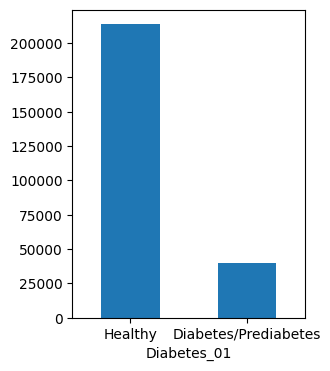

In [ ]:
#Quick barplot for Diabetes category
plt.figure(figsize=(3,4),dpi=100)
df["Diabetes_01"].value_counts().plot.bar()
plt.xticks([0,1], ['Healthy', 'Diabetes/Prediabetes'])
plt.xticks(rotation=0)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
df_ransampled, y_ransampled = rus.fit_resample(df, df['Diabetes_01'])
df_ransampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79954 entries, 162288 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                79954 non-null  float64
 1   HighChol              79954 non-null  float64
 2   CholCheck             79954 non-null  float64
 3   BMI                   79954 non-null  float64
 4   Smoker                79954 non-null  float64
 5   Stroke                79954 non-null  float64
 6   HeartDiseaseorAttack  79954 non-null  float64
 7   PhysActivity          79954 non-null  float64
 8   Fruits                79954 non-null  float64
 9   Veggies               79954 non-null  float64
 10  HvyAlcoholConsump     79954 non-null  float64
 11  AnyHealthcare         79954 non-null  float64
 12  NoDocbcCost           79954 non-null  float64
 13  GenHlth               79954 non-null  float64
 14  MentHlth              79954 non-null  float64
 15  PhysHlth          

(array([0, 1]), [Text(0, 0, 'Healthy'), Text(1, 0, 'Diabetes/Prediabetes')])

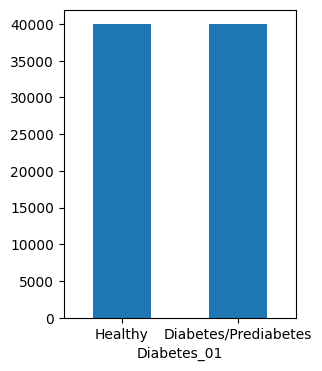

In [ ]:
#Quick barplot for Diabetes category
plt.figure(figsize=(3,4),dpi=100)
df_ransampled["Diabetes_01"].value_counts().plot.bar()
plt.xticks([0,1], ['Healthy', 'Diabetes/Prediabetes'])
plt.xticks(rotation=0)

In [ ]:
#Chia 2 feature type:
colsM = df_ransampled.iloc[:, [21, 0, 1, 3, 6]]
colsL = df_ransampled.iloc[:, [21, 4, 5, 7,8,9,10,13,14,15,16,17,18,19,20]]

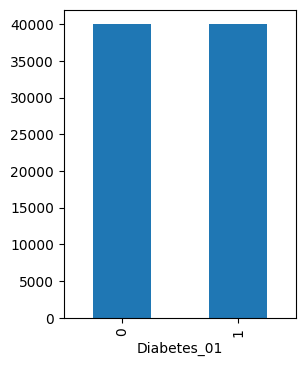

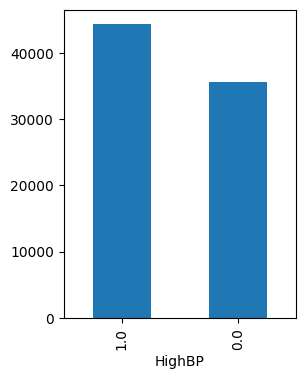

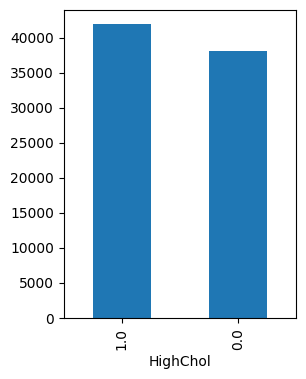

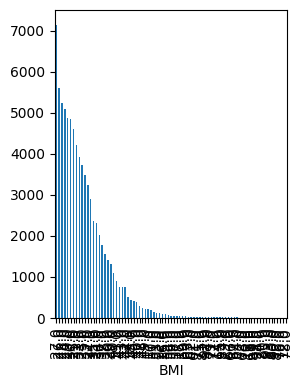

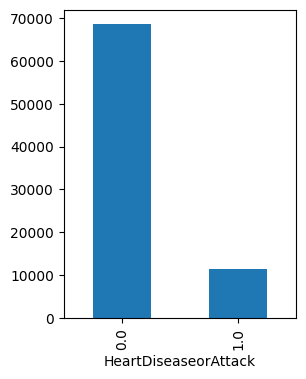

In [ ]:
#Quick barplot for categorical data, showing how many data points belong to each category (or how diverse is our data)
for i in colsM.columns:
    plt.figure(figsize=(3,4),dpi=100)
    colsM[i].value_counts().plot.bar()

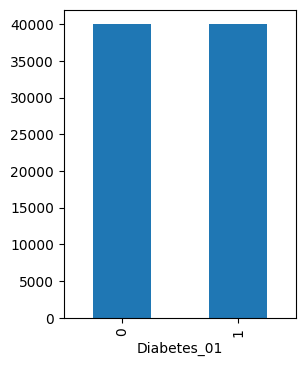

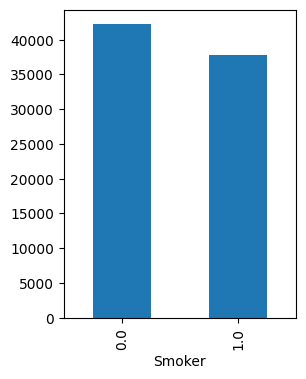

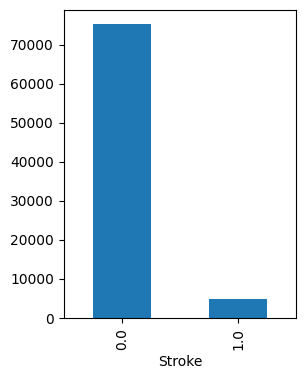

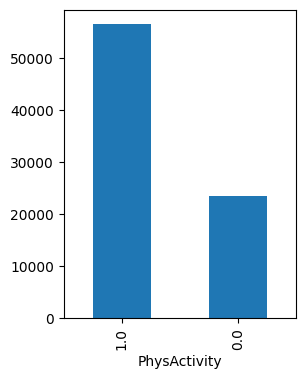

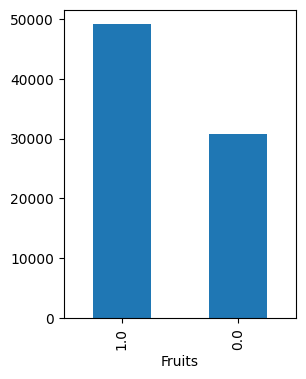

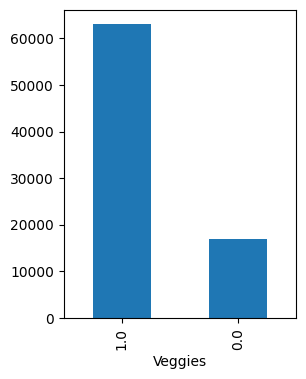

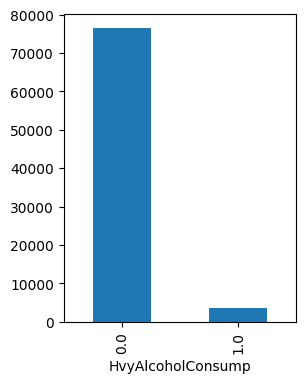

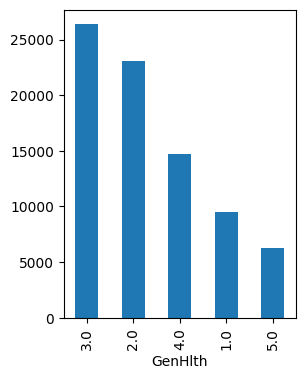

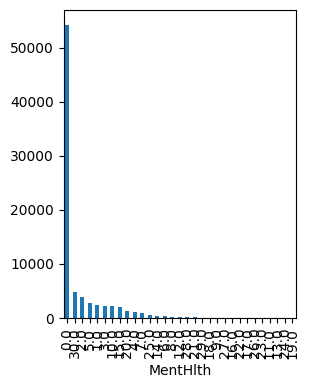

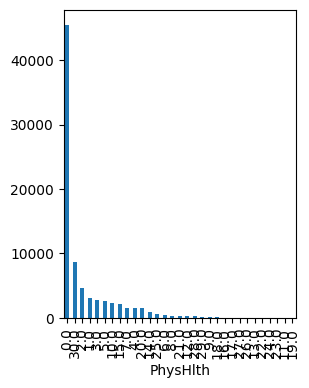

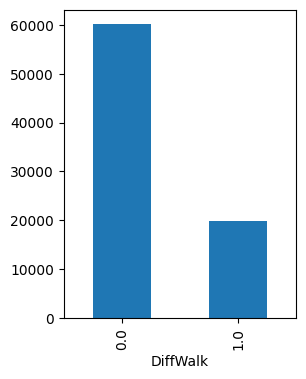

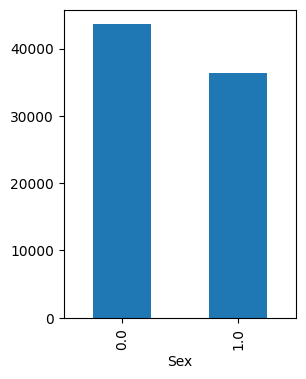

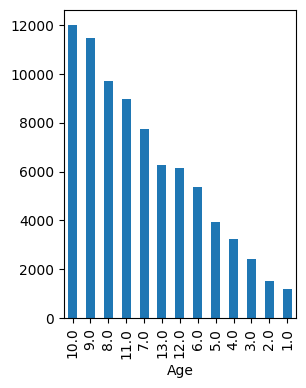

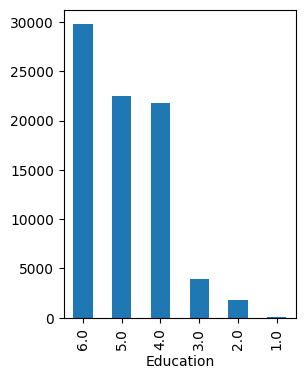

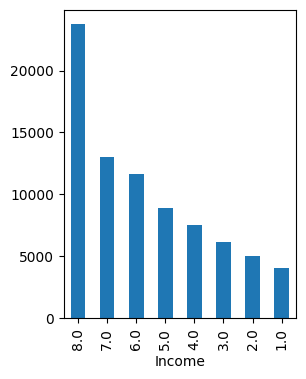

In [ ]:
#Quick barplot for categorical data, showing how many data points belong to each category (or how diverse is our data)
for i in colsL.columns:
    plt.figure(figsize=(3,4),dpi=100)
    colsL[i].value_counts().plot.bar()

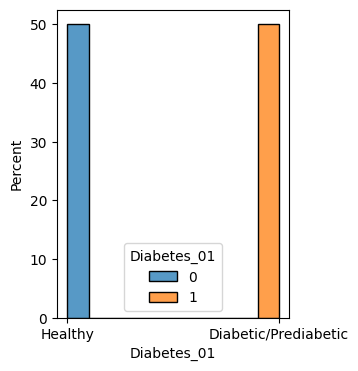

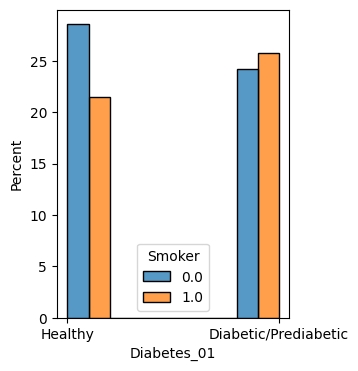

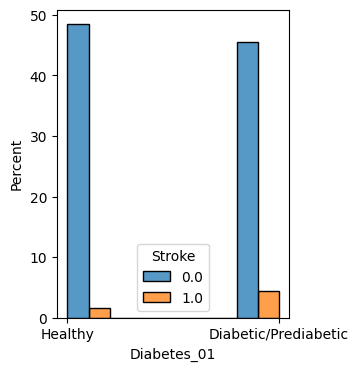

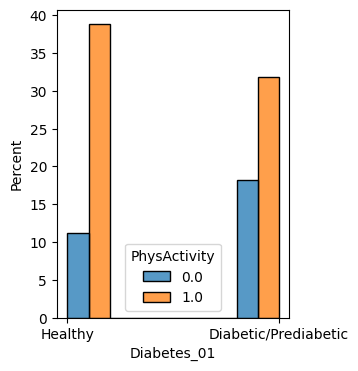

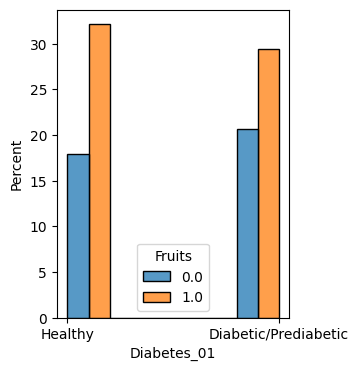

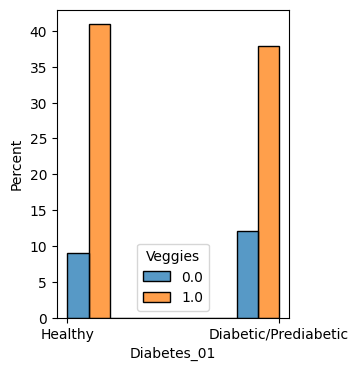

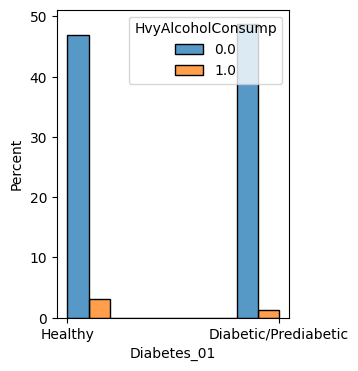

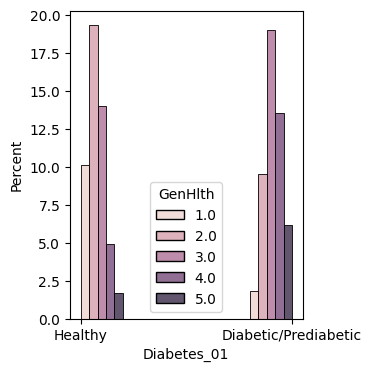

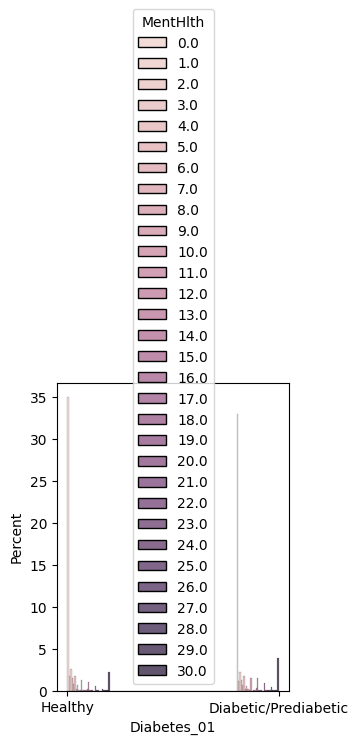

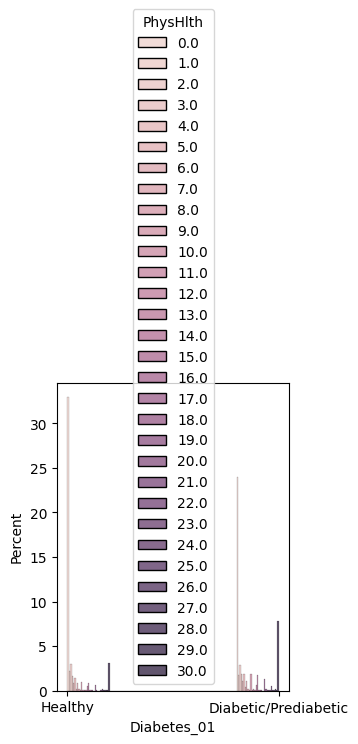

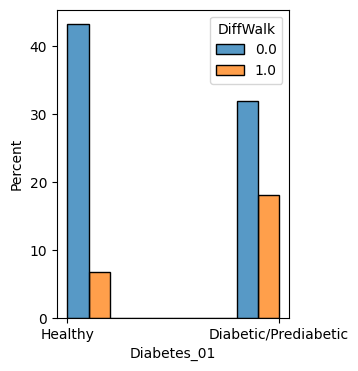

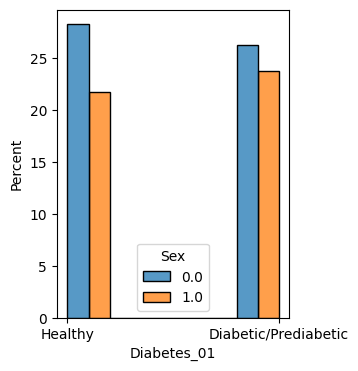

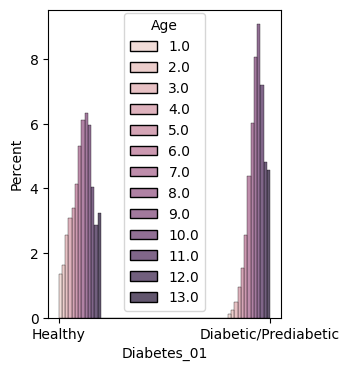

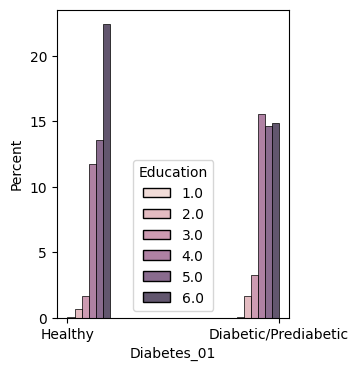

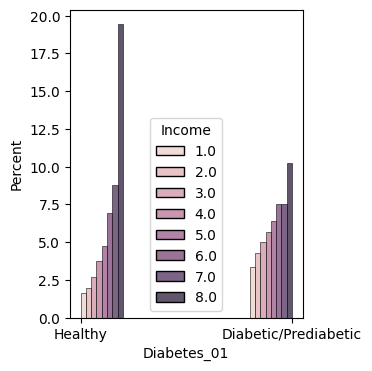

In [ ]:
#Quick histplot for data in Feature Lifestyle
for i in colsL.columns:
  plt.figure(figsize=(3,4),dpi=100)
  sns.histplot(data=colsL, x="Diabetes_01", hue=i, multiple="dodge", binwidth = 0.2,stat = 'percent')
  plt.xticks([0,1], ['Healthy', 'Diabetic/Prediabetic'])

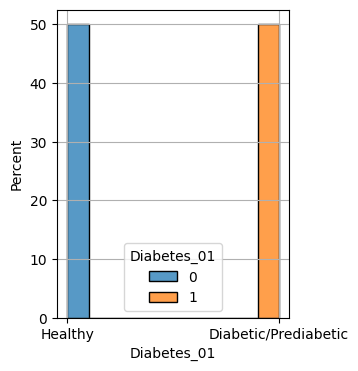

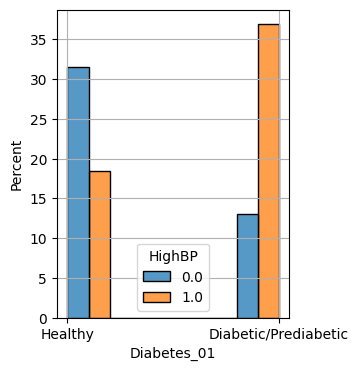

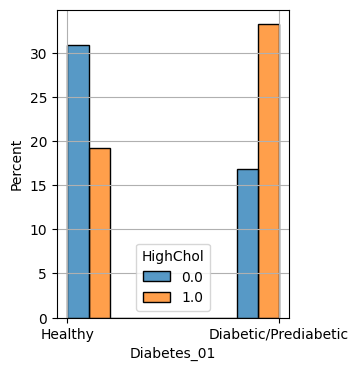

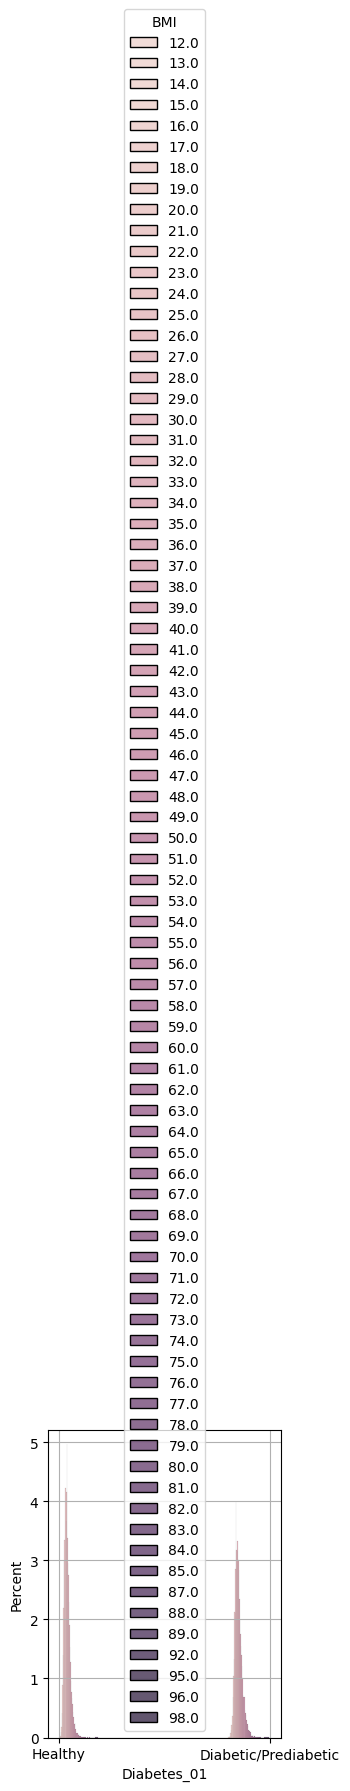

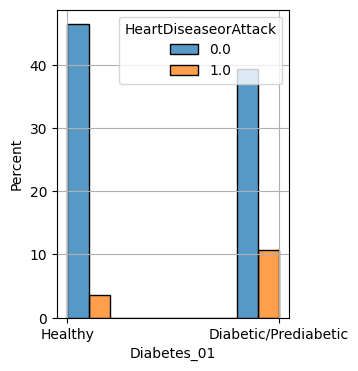

In [ ]:
#Quick histplot for data in Feature Measure
for i in colsM.columns:
  plt.figure(figsize=(3,4),dpi=100)
  sns.histplot(data=colsM, x="Diabetes_01", hue=i, multiple="dodge", binwidth = 0.2,stat = 'percent')
  plt.xticks([0,1], ['Healthy', 'Diabetic/Prediabetic'])
  plt.grid()

<Axes: xlabel='BMI', ylabel='Count'>

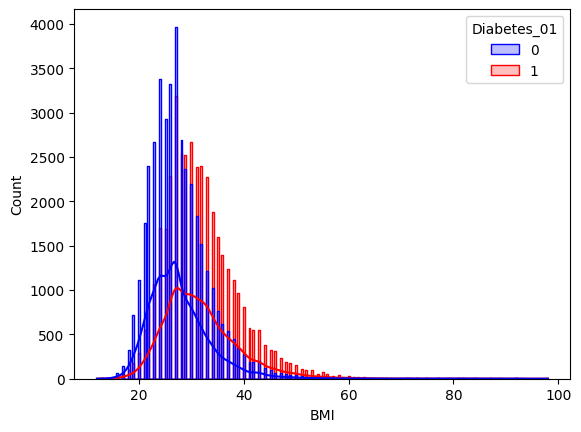

In [ ]:
# histplot shows the difference in BMI of healthy vs Diabetic patients
sns.histplot(colsM, x="BMI", hue="Diabetes_01", element="step", kde=True, palette=['blue', 'red'])

In [ ]:
y=df_ransampled['Diabetes_01']
X=df_ransampled.drop('Diabetes_01',axis='columns',inplace=False)
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import datetime
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
#Tạo danh sách chứa tên mô hình:
models = [LogisticRegression(),
    DecisionTreeClassifier(max_depth=6,random_state=1),
    RandomForestClassifier(criterion= 'gini', max_depth= 10, n_estimators= 30, random_state=1),
    SVC(kernel='linear', C= 0.001, gamma=0.0001,random_state=1),
    KNeighborsClassifier(n_neighbors=10)]
precision=[]
recall=[]
f1=[]
time=[]
name=[]

In [ ]:
for model in models:
  t1 = datetime.datetime.now()
  model_name = model.__class__.__name__
  model.fit(X_train, y_train)
  t2= datetime.datetime.now()
  d = round((t2-t1).microseconds/1000,1) #Tính thời gian
  y_pred = model.predict(X_test)
  pre = round(precision_score(y_test, y_pred,average='micro'),2)
  rec = round(recall_score(y_test, y_pred,average='micro'),2)
  f1_=round(f1_score(y_test, y_pred,average='micro'),2)
  precision.append(pre)
  recall.append(rec)
  f1.append(f1_)
  time.append(d)
  name.append(model_name)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Đưa kết quả thành một bảng tổng hợp.
Results = pd.DataFrame(np.column_stack([name, precision, recall,f1,time]),columns=['Name', 'Precision','Recall','F1-score','Time (s)'])
Results

,Name,Precision,Recall,F1-score,Time (s)
0,LogisticRegression,0.74,0.74,0.74,551.3
1,DecisionTreeClassifier,0.73,0.73,0.73,120.6
2,RandomForestClassifier,0.74,0.74,0.74,171.4
3,SVC,0.74,0.74,0.74,712.6
4,KNeighborsClassifier,0.71,0.71,0.71,11.8


In [ ]:
#Xây dựng mô hình Logistic Regression
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)
y_pred = modelLR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     11792
           1       0.74      0.75      0.74     12195

    accuracy                           0.74     23987
   macro avg       0.74      0.74      0.74     23987
weighted avg       0.74      0.74      0.74     23987



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


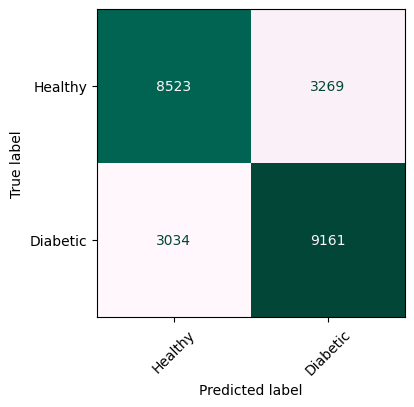

In [ ]:
#Đánh giá mô hình bằng confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['Healthy', 'Diabetic']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="PuBuGn")

In [ ]:
#Xây dựng mô hình Decision Tree Classifier
from sklearn import tree
# Sử dụng vòng lặp for để tìm max_depth
score_total=[]
for i in range(1,20):
  modelDT = tree.DecisionTreeClassifier(max_depth=i,random_state=1)
  modelDT.fit(X_train, y_train)
  y_pred=modelDT.predict(X_test)
  score_total.append(accuracy_score(y_test, y_pred))


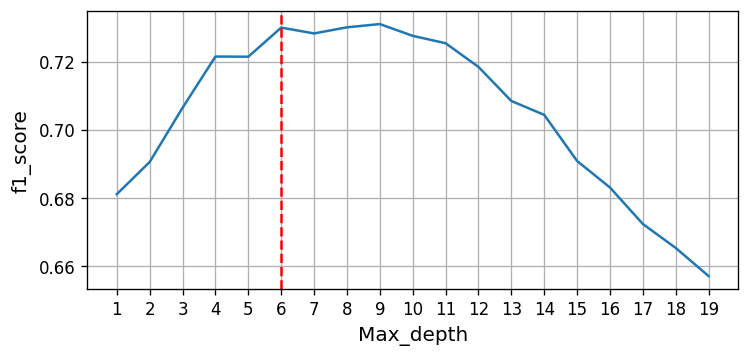

In [ ]:
#Vẽ hình thể hiện độ chính xác theo giá trị max_depth
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
plt.ylabel('f1_score',fontsize=12)
plt.xlabel('Max_depth',fontsize=12)
plt.plot(range(1, 20), score_total)
plt.xticks(range(1, 20))
plt.axvline(x=6, color='r', linestyle='--')
plt.grid('minor')

In [ ]:
# Chúng ta có thể vẽ lại cây quyết định như sau
modelDT = tree.DecisionTreeClassifier(max_depth=6,random_state=1)
modelDT = modelDT.fit(X_train, y_train)#Tính toán/fit model
import graphviz #Thư viện để hiển thị hình ảnh
dot_data = tree.export_graphviz(modelDT, out_file=None,feature_names=['HighBP','HighChol','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income'],class_names=['Healthy',"Diabetic"],filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#Xây dựng mô hình Random Forest Classifier
modelRF = RandomForestClassifier(n_estimators=25,random_state=1)
modelRF.fit(X_train, y_train)
y_pred=modelRF.predict(X_test)
accuracy_score(y_test,y_pred)

0.7192646016592321

In [ ]:
# Random Forest Classifier k-tuning (n_estimators,max_depth,max_features)
rf = RandomForestClassifier(random_state=1)
from sklearn.model_selection import GridSearchCV
grid_space = {'max_depth':[3, 5, 10,15, 20, None],
              'n_estimators':[2, 5, 9, 10, 15, 20, 30],
              'criterion':['gini','entropy']
              }
rf_grid = GridSearchCV(rf, param_grid=grid_space, scoring='recall')
model_grid = rf_grid.fit(X_train, y_train)
model_grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 30}

In [ ]:
# SVC
modelSVC = SVC(kernel='linear', C= 0.001, gamma=0.0001,random_state=1)
modelSVC.fit(X_train, y_train)
y_pred = modelSVC.predict(X_test)
pre = round(precision_score(y_test, y_pred,average='micro'),2)
rec = round(recall_score(y_test, y_pred,average='micro'),2)
f1_=round(f1_score(y_test, y_pred,average='micro'),2)
print(pre,rec,f1_)

0.74 0.74 0.74


In [ ]:
# SVC k-tuning (C,gamma)
from sklearn.model_selection import GridSearchCV
grid_space = {
    'C': [0.001, 0.01, 0.1],
    'gamma' : [0.0001, 0.001,0.01],
    'kernel': ['linear']
}
SVC_reg = SVC()
SVC_grid = GridSearchCV(SVC_reg, param_grid=grid_space, scoring='recall')

SVC_grid.fit(X_train, y_train)
SVC_grid.best_params_

{'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}

In [ ]:
# KNN classifier k-tuning (n_neighbors)
pre_KNNC = []
rec_KNNC = []
n_neighbors=[]
f1_KNNC=[]
for i in range(1,20):
  model_KNNC = KNeighborsClassifier(n_neighbors=i)
  model_KNNC.fit(X_train, y_train)
  y_pred = model_KNNC.predict(X_test)
  pre = round(precision_score(y_test, y_pred,average='micro'),2)
  rec = round(recall_score(y_test, y_pred,average='micro'),2)
  f1_=round(f1_score(y_test, y_pred,average='micro'),2)
  pre_KNNC.append(pre)
  rec_KNNC.append(rec)
  f1_KNNC.append(f1_)
  n_neighbors.append(i)
#Đưa kết quả thành một bảng tổng hợp.
ResultsKNNC = pd.DataFrame(np.column_stack([n_neighbors, pre_KNNC, rec_KNNC,f1_KNNC]),columns=['n_neighbors', 'Precision','Recall','F1 score'])
ResultsKNNC

,n_neighbors,Precision,Recall,F1 score
0,1.0,0.65,0.65,0.65
1,2.0,0.64,0.64,0.64
2,3.0,0.68,0.68,0.68
3,4.0,0.68,0.68,0.68
4,5.0,0.70,0.70,0.70
5,6.0,0.69,0.69,0.69
6,7.0,0.71,0.71,0.71
7,8.0,0.70,0.70,0.70
8,9.0,0.71,0.71,0.71
9,10.0,0.71,0.71,0.71


In [ ]:
#Tao du lieu train test cho 2 loai features
y_colsM=colsM['Diabetes_01']
X_colsM=colsM.drop('Diabetes_01',axis='columns',inplace=False)

y_colsL=colsL['Diabetes_01']
X_colsL=colsL.drop('Diabetes_01',axis='columns',inplace=False)
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
XM_train, XM_test, yM_train, yM_test = train_test_split(X_colsM,y_colsM,test_size=0.3,random_state=1)

XL_train, XL_test, yL_train, yL_test = train_test_split(X_colsL,y_colsL,test_size=0.3,random_state=1)
#Tao list chua ket qua so sanh
precision1=[]
recall1=[]
f11=[]
name1 = []
accuracy = []

In [ ]:
#Chay ML cho feature lifestyle
modelLR1 = LogisticRegression()
modelLR1.fit(XL_train, yL_train)
yL_pred = modelLR1.predict(XL_test)
pre1 = round(precision_score(yL_test, yL_pred,average='micro'),2)
rec1 = round(recall_score(yL_test, yL_pred,average='micro'),2)
f1_1=round(f1_score(yL_test, yL_pred,average='micro'),2)
acc_1 = round(accuracy_score(yL_test, yL_pred),2)
accuracy.append(acc_1)
recall1.append(rec1)
f11.append(f1_1)
precision1.append(pre1)
name1.append("Feature Lifestyle")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Chay ML cho feature measured
modelLR2 = LogisticRegression()
modelLR2.fit(XM_train, yM_train)
yM_pred = modelLR2.predict(XM_test)
pre2 = round(precision_score(yM_test, yM_pred,average='micro'),2)
rec2 = round(recall_score(yM_test, yM_pred,average='micro'),2)
f1_2=round(f1_score(yM_test, yM_pred,average='micro'),2)
acc_2 = round(accuracy_score(yM_test, yM_pred),2)
accuracy.append(acc_2)
recall1.append(rec2)
f11.append(f1_2)
precision1.append(pre2)
name1.append("Feature Measured")

In [ ]:
#Xây dựng mô hình Logistic Regression
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)
y_pred = modelLR.predict(X_test)
pre3 = round(precision_score(y_test, y_pred,average='micro'),2)
rec3 = round(recall_score(y_test, y_pred,average='micro'),2)
f1_3=round(f1_score(y_test, y_pred,average='micro'),2)
acc_3 = round(accuracy_score(y_test, y_pred),2)
accuracy.append(acc_3)
recall1.append(rec3)
f11.append(f1_3)
precision1.append(pre3)
name1.append("Full Feature")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Results1 = pd.DataFrame(np.column_stack([name1, precision1, recall1,f11, accuracy]),columns=['Name', 'Precision','Recall','F1-score','accuracy score'])
Results1

,Name,Precision,Recall,F1-score,accuracy score
0,Feature Lifestyle,0.7,0.7,0.7,0.7
1,Feature Measured,0.71,0.71,0.71,0.71
2,Feature Full,0.74,0.74,0.74,0.74
